In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oil = pd.read_csv('oil_sentiment.csv')
climate = pd.read_csv('climate_sentiment.csv')
emicom = pd.read_csv('emission_consumption.csv')
price = pd.read_csv('all_commodities.csv')

In [3]:
oil_price = price[price['Commodity'] == 'Brent Crude Oil']
oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_68753/158445477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)


In [4]:
oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])
oil_price.set_index('Date_Time', inplace=True)
oil_price

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_68753/3093365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])


,Value
Date_Time,
2024-01-22,81.70
2024-01-19,80.71
2024-01-18,81.04
2024-01-17,78.88
2024-01-16,80.15
...,...
1987-05-26,18.63
1987-05-25,18.60
1987-05-22,18.55


In [5]:
# map sentiment to numerical values
climate['sentiment'] = climate['Sentiments'].map({'positive': 1, 'negative': -1, 'neutral': 0})
climate['date'] = pd.to_datetime(climate['date'])
climate_sum = climate.groupby('date').sum()

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_68753/1407686692.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  climate_sum = climate.groupby('date').sum()


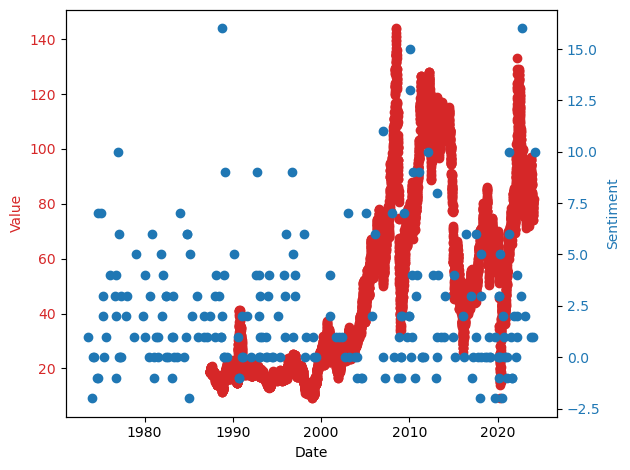

In [6]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.scatter(oil_price.index, oil_price['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.scatter(climate_sum.index, climate_sum['sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [7]:
# find correlation between oil prices and climate sentiment
oil_price_resample = oil_price.resample('D').mean()
climate_sum_resample = climate_sum.resample('D').mean()

# interpolate missing values
oil_price_resample = oil_price_resample.interpolate()
climate_sum_resample = climate_sum_resample.interpolate()

# cut climate sentiment to match oil prices
climate_sum_resample = climate_sum_resample[climate_sum_resample.index.isin(oil_price_resample.index)]

correlation = oil_price_resample['Value'].corr(climate_sum_resample['sentiment'])

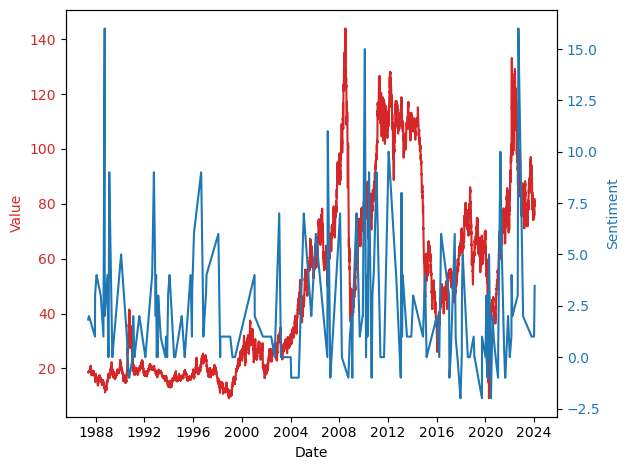

In [9]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.plot(oil_price_resample.index, oil_price_resample['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.plot(climate_sum_resample.index, climate_sum_resample['sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [14]:
from LinearModel import *

The p-value for the F-test is: 2.2344363437214334e-31.
The model is statistically significant.


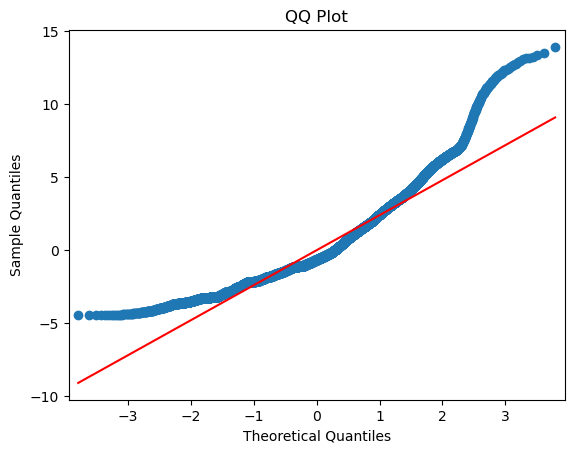

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 6783.839295665942, 'Chi^2 two-tail prob.': 0.0, 'Skew': 1.265204458489104, 'Kurtosis': 5.397897295466538}


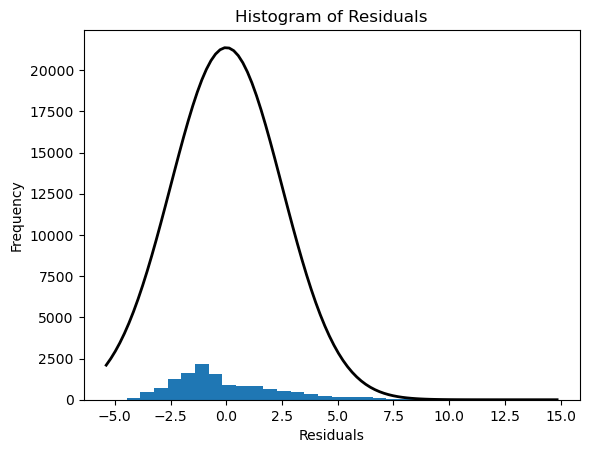

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 267.00691159016526, 'p-value': 5.096277514027697e-60, 'f-value': 272.39599873874937, 'f p-value': 1.3504538445834517e-60}


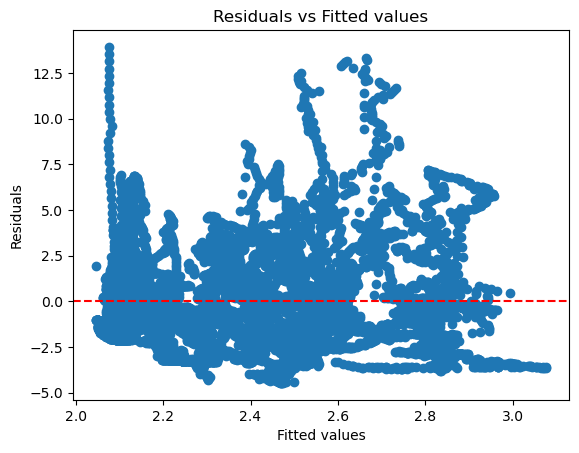

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 0.003735528461782869, 'p-value': 0.9970194864456723}


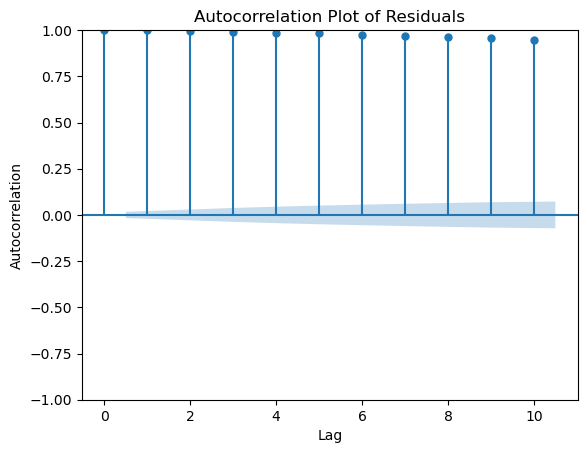

The residuals are not autocorrelated.
The correlation matrix is:


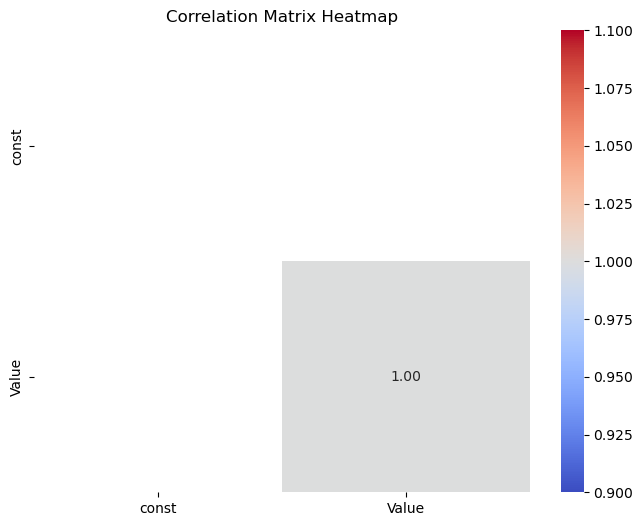

  Variable       VIF
0    const  3.260351
1    Value  1.000000
There is no multicollinearity in the model.
                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.23e-31
Time:                        16:59:36   Log-Likelihood:                -31290.
No. Observations:               13397   AIC:                         6.258e+04
Df Residuals:                   13395   BIC:                         6.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

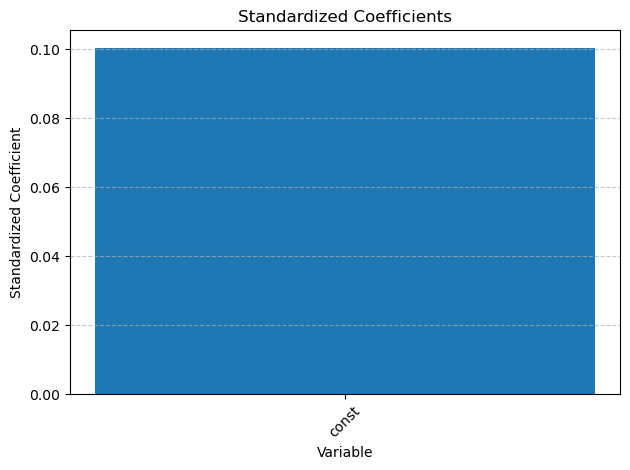

In [13]:
test_linear_model(oil_price_resample, climate_sum_resample['sentiment'])